In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [82]:
df.shape

(3140, 108)

In [83]:
print(df.columns.tolist())

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

In [84]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


/tmp/ipykernel_804/484887886.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[0], data=df[df['COUNTY_NAME'].isin(top_counties)],
/tmp/ipykernel_804/484887886.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axis[1], data=df[df['STATE_NAME'].isin(top_states)],


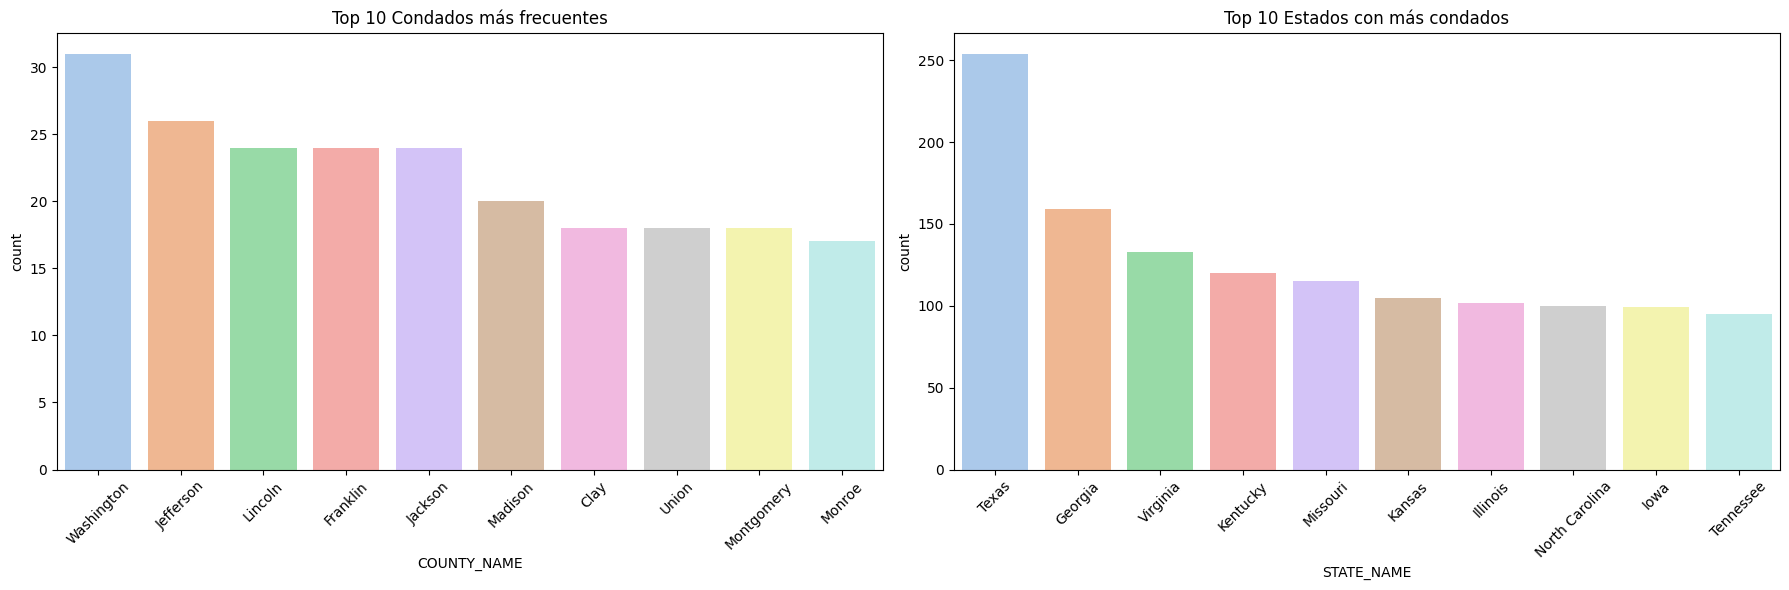

In [85]:

top_counties = df['COUNTY_NAME'].value_counts().nlargest(10).index
top_states = df['STATE_NAME'].value_counts().nlargest(10).index

fig, axis = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(ax=axis[0], data=df[df['COUNTY_NAME'].isin(top_counties)],
              x="COUNTY_NAME", palette='pastel', order=top_counties)
axis[0].set_title("Top 10 Condados más frecuentes")
axis[0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axis[1], data=df[df['STATE_NAME'].isin(top_states)],
              x="STATE_NAME", palette='pastel', order=top_states)
axis[1].set_title("Top 10 Estados con más condados")
axis[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

He agrupado los más comunes por que si no al haber tantos datos no se veía bien,

In [86]:
int_columns = df.select_dtypes(include=['int64']).columns.tolist()

# Mostrar las columnas de tipo int64
print("Columnas de tipo int64:")
print(int_columns)

Columnas de tipo int64:
['fips', 'TOT_POP', '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 'White-alone pop', 'Black-alone pop', 'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 'Two or more races pop', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'MEDHHINC_2018', 'CI90LBINC_2018', 'CI90UBINC_2018', 'Civilian_labor_force_2018', 'Employed_2018', 'Unemployed_2018', 'Median_Household_Income_2018', 'ICU Beds_x', 'Total Population', 'Population Aged 60+', 'STATE_FIPS', 'CNTY_FIPS', 'county_pop2018_18 and older', 'anycondition_number', 'Obesity_number', 'Heart disease_number', 'COPD_number', 'diabetes_number', 'CKD_number', 'Urban_rural_code']


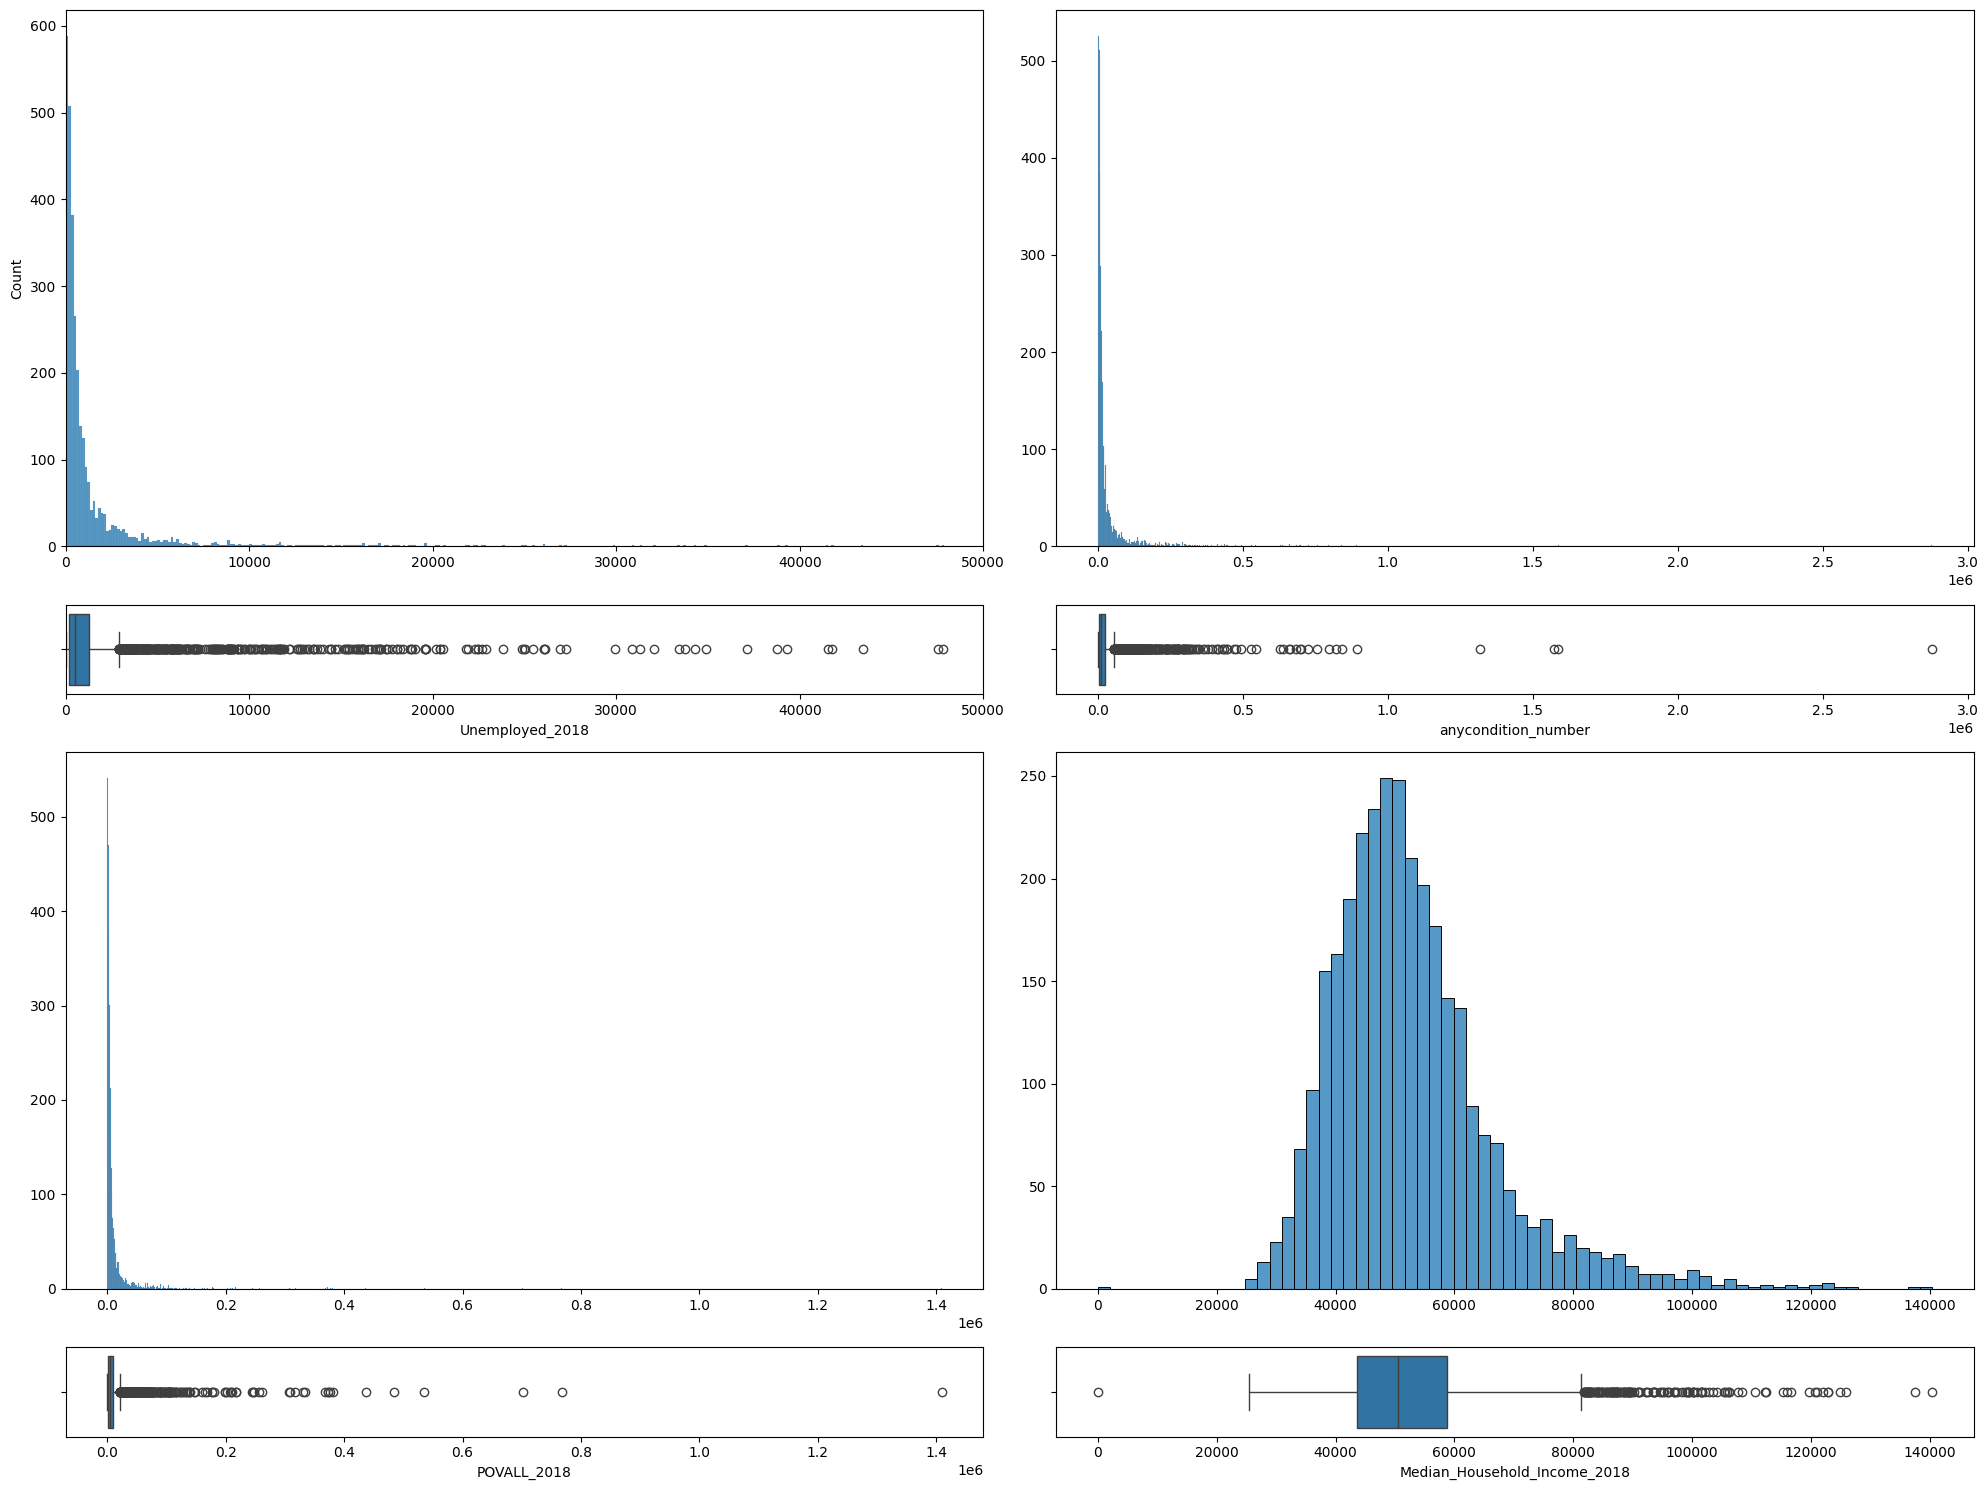

In [87]:
fig, axis = plt.subplots(4, 2, figsize = (20, 15), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "Unemployed_2018").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "Unemployed_2018")
axis[0, 0].set_xlim(0, 50000)
axis[1, 0].set_xlim(0, 50000)

sns.histplot(ax = axis[0, 1], data = df, x = "anycondition_number").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "anycondition_number")


sns.histplot(ax = axis[2, 0], data = df, x = "POVALL_2018").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "POVALL_2018")

sns.histplot(ax = axis[2, 1], data = df, x = "Median_Household_Income_2018").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "Median_Household_Income_2018")

plt.tight_layout()

plt.show()

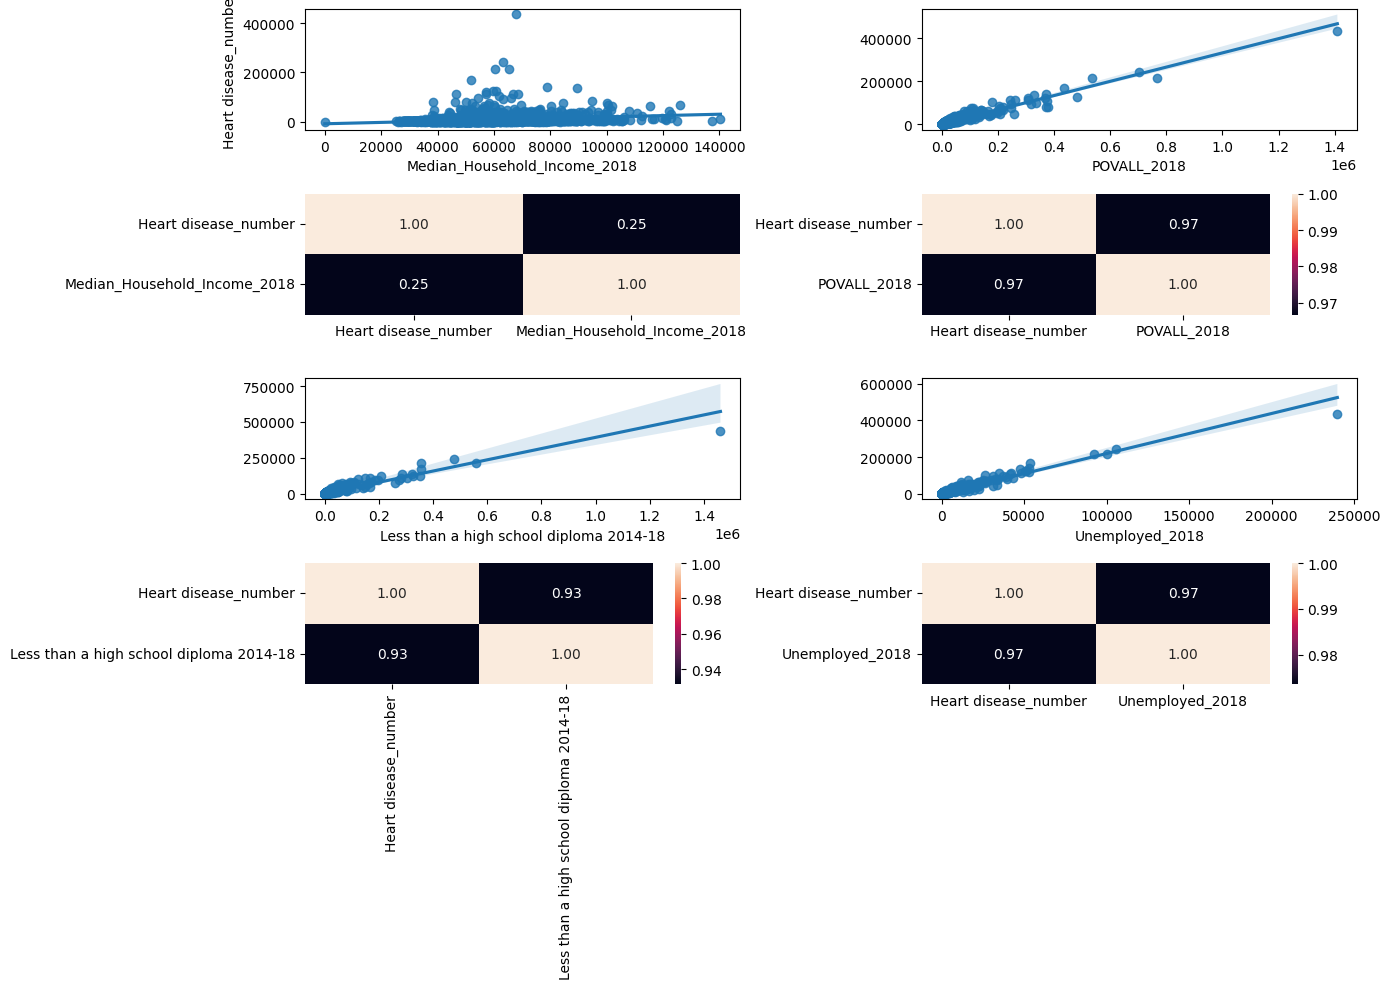

In [88]:
fig, axis = plt.subplots(4, 2, figsize = (14, 10))

sns.regplot(ax = axis[0, 0], data = df, x = "Median_Household_Income_2018", y = "Heart disease_number")
sns.heatmap(df[["Heart disease_number", "Median_Household_Income_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "POVALL_2018", y = "Heart disease_number").set(ylabel=None)
sns.heatmap(df[["Heart disease_number", "POVALL_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "Less than a high school diploma 2014-18", y = "Heart disease_number").set(ylabel=None)
sns.heatmap(df[["Heart disease_number", "Less than a high school diploma 2014-18"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

sns.regplot(ax = axis[2, 1], data = df, x = "Unemployed_2018", y = "Heart disease_number").set(ylabel=None)
sns.heatmap(df[["Heart disease_number", "Unemployed_2018"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])


plt.tight_layout()


plt.show()

/tmp/ipykernel_804/2040570969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axis[0], data = df[df["COUNTY_NAME"].isin(top_counties)],
/tmp/ipykernel_804/2040570969.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax = axis[1], data = df[df["STATE_NAME"].isin(top_states)],


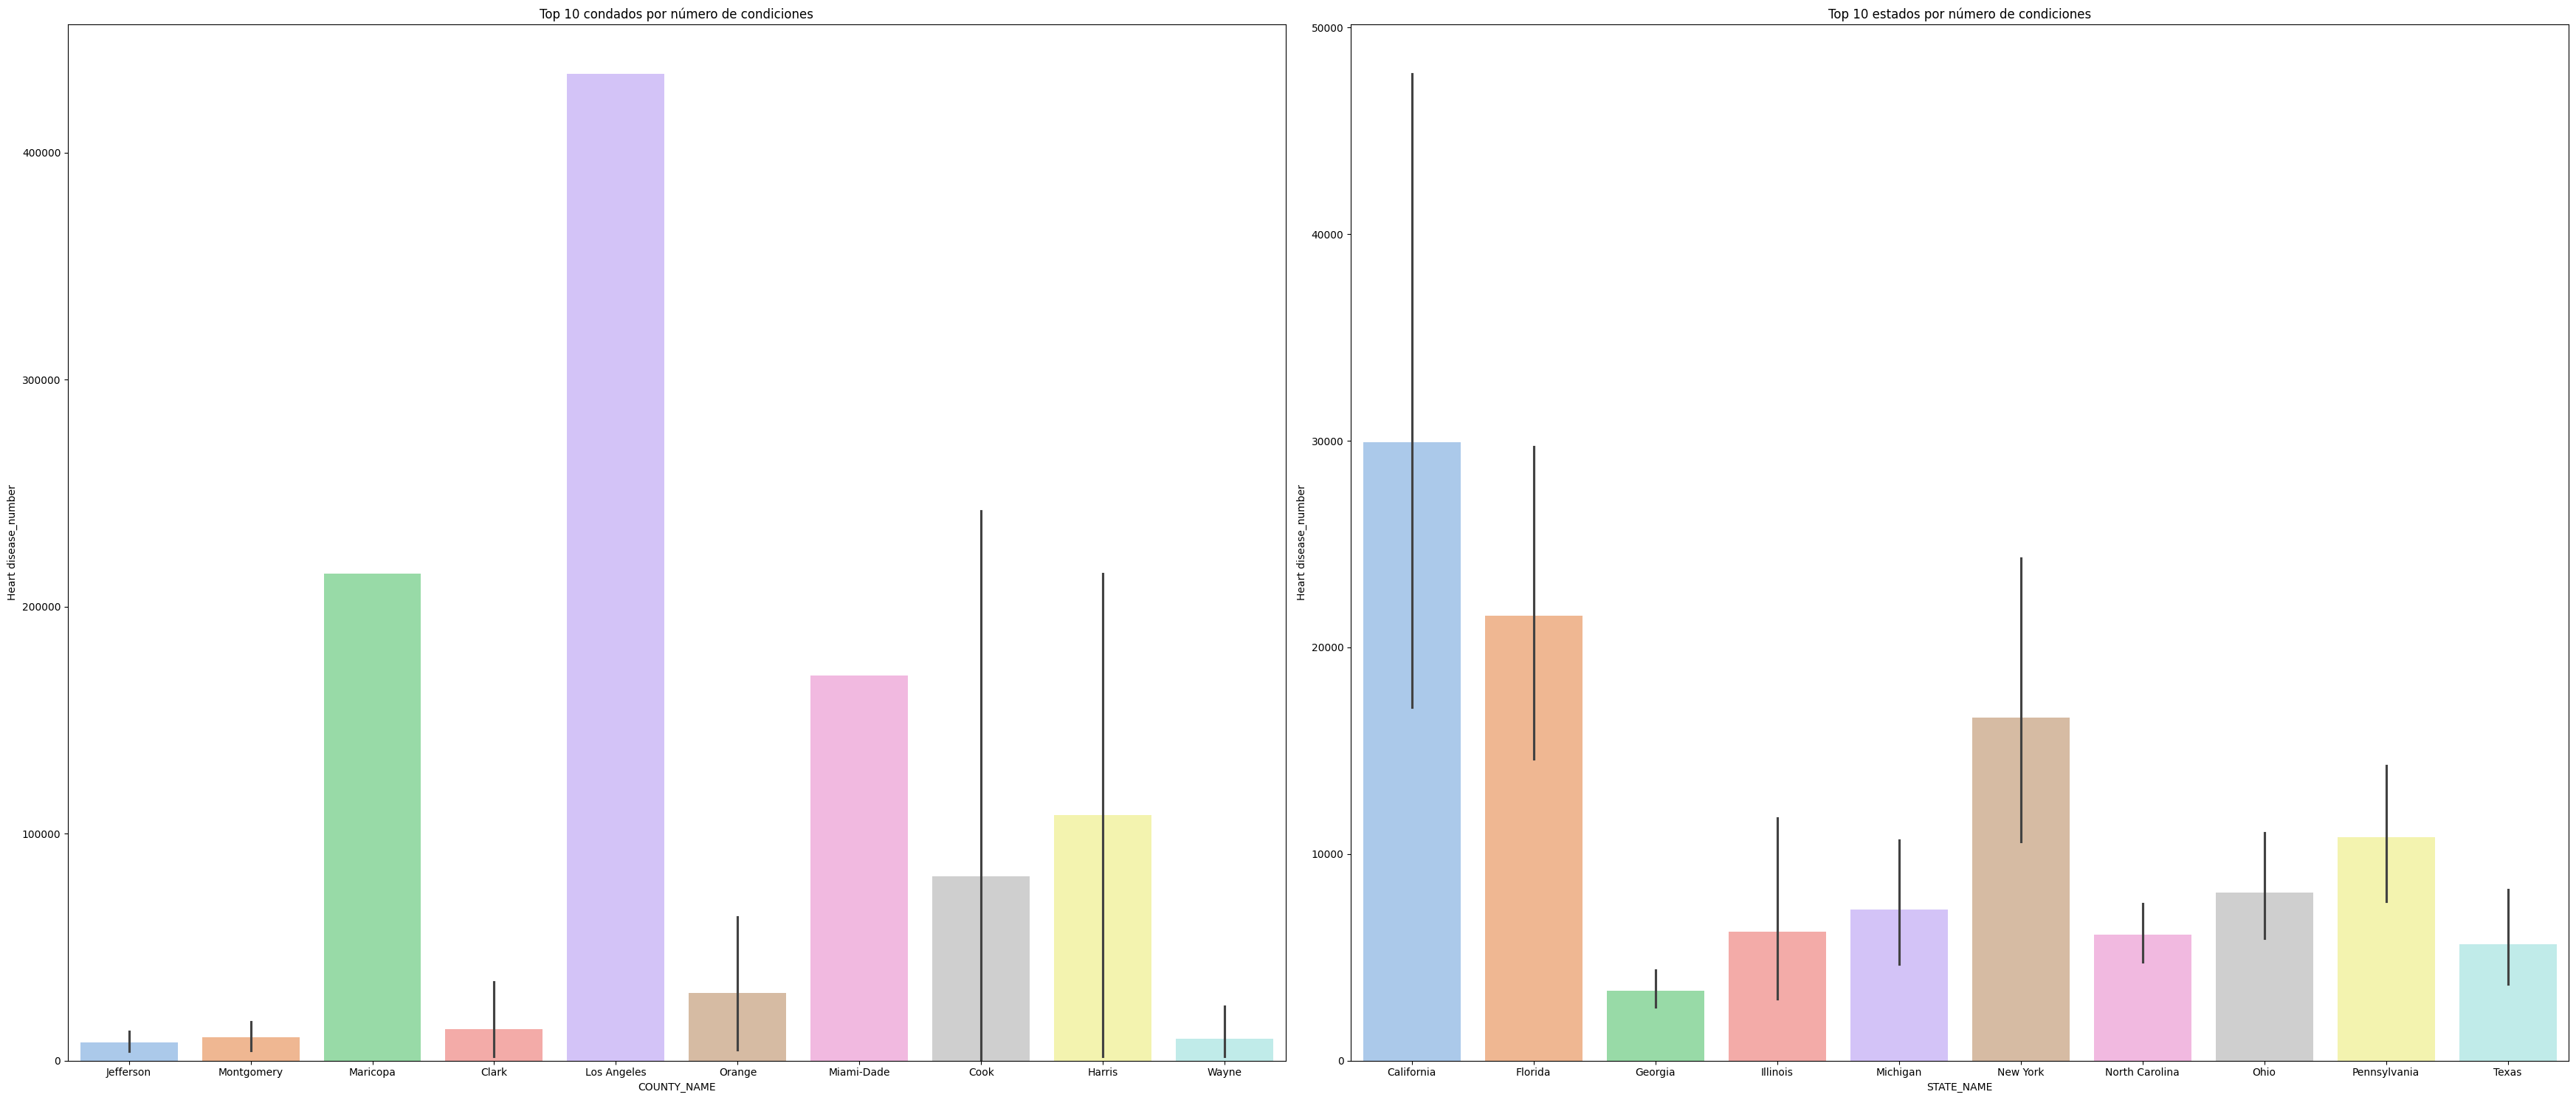

In [89]:
# Top 10 counties con más casos
top_counties = df.groupby("COUNTY_NAME")["Heart disease_number"].sum().nlargest(10).index
top_states = df.groupby("STATE_NAME")["Heart disease_number"].sum().nlargest(10).index

fig, axis = plt.subplots(1, 2, figsize = (35, 15))

sns.barplot(ax = axis[0], data = df[df["COUNTY_NAME"].isin(top_counties)],
            x = "COUNTY_NAME", y = "Heart disease_number", palette="pastel")
axis[0].set_title("Top 10 condados por número de condiciones")

sns.barplot(ax = axis[1], data = df[df["STATE_NAME"].isin(top_states)],
            x = "STATE_NAME", y = "Heart disease_number", palette="pastel")
axis[1].set_title("Top 10 estados por número de condiciones")

plt.tight_layout()
plt.show()

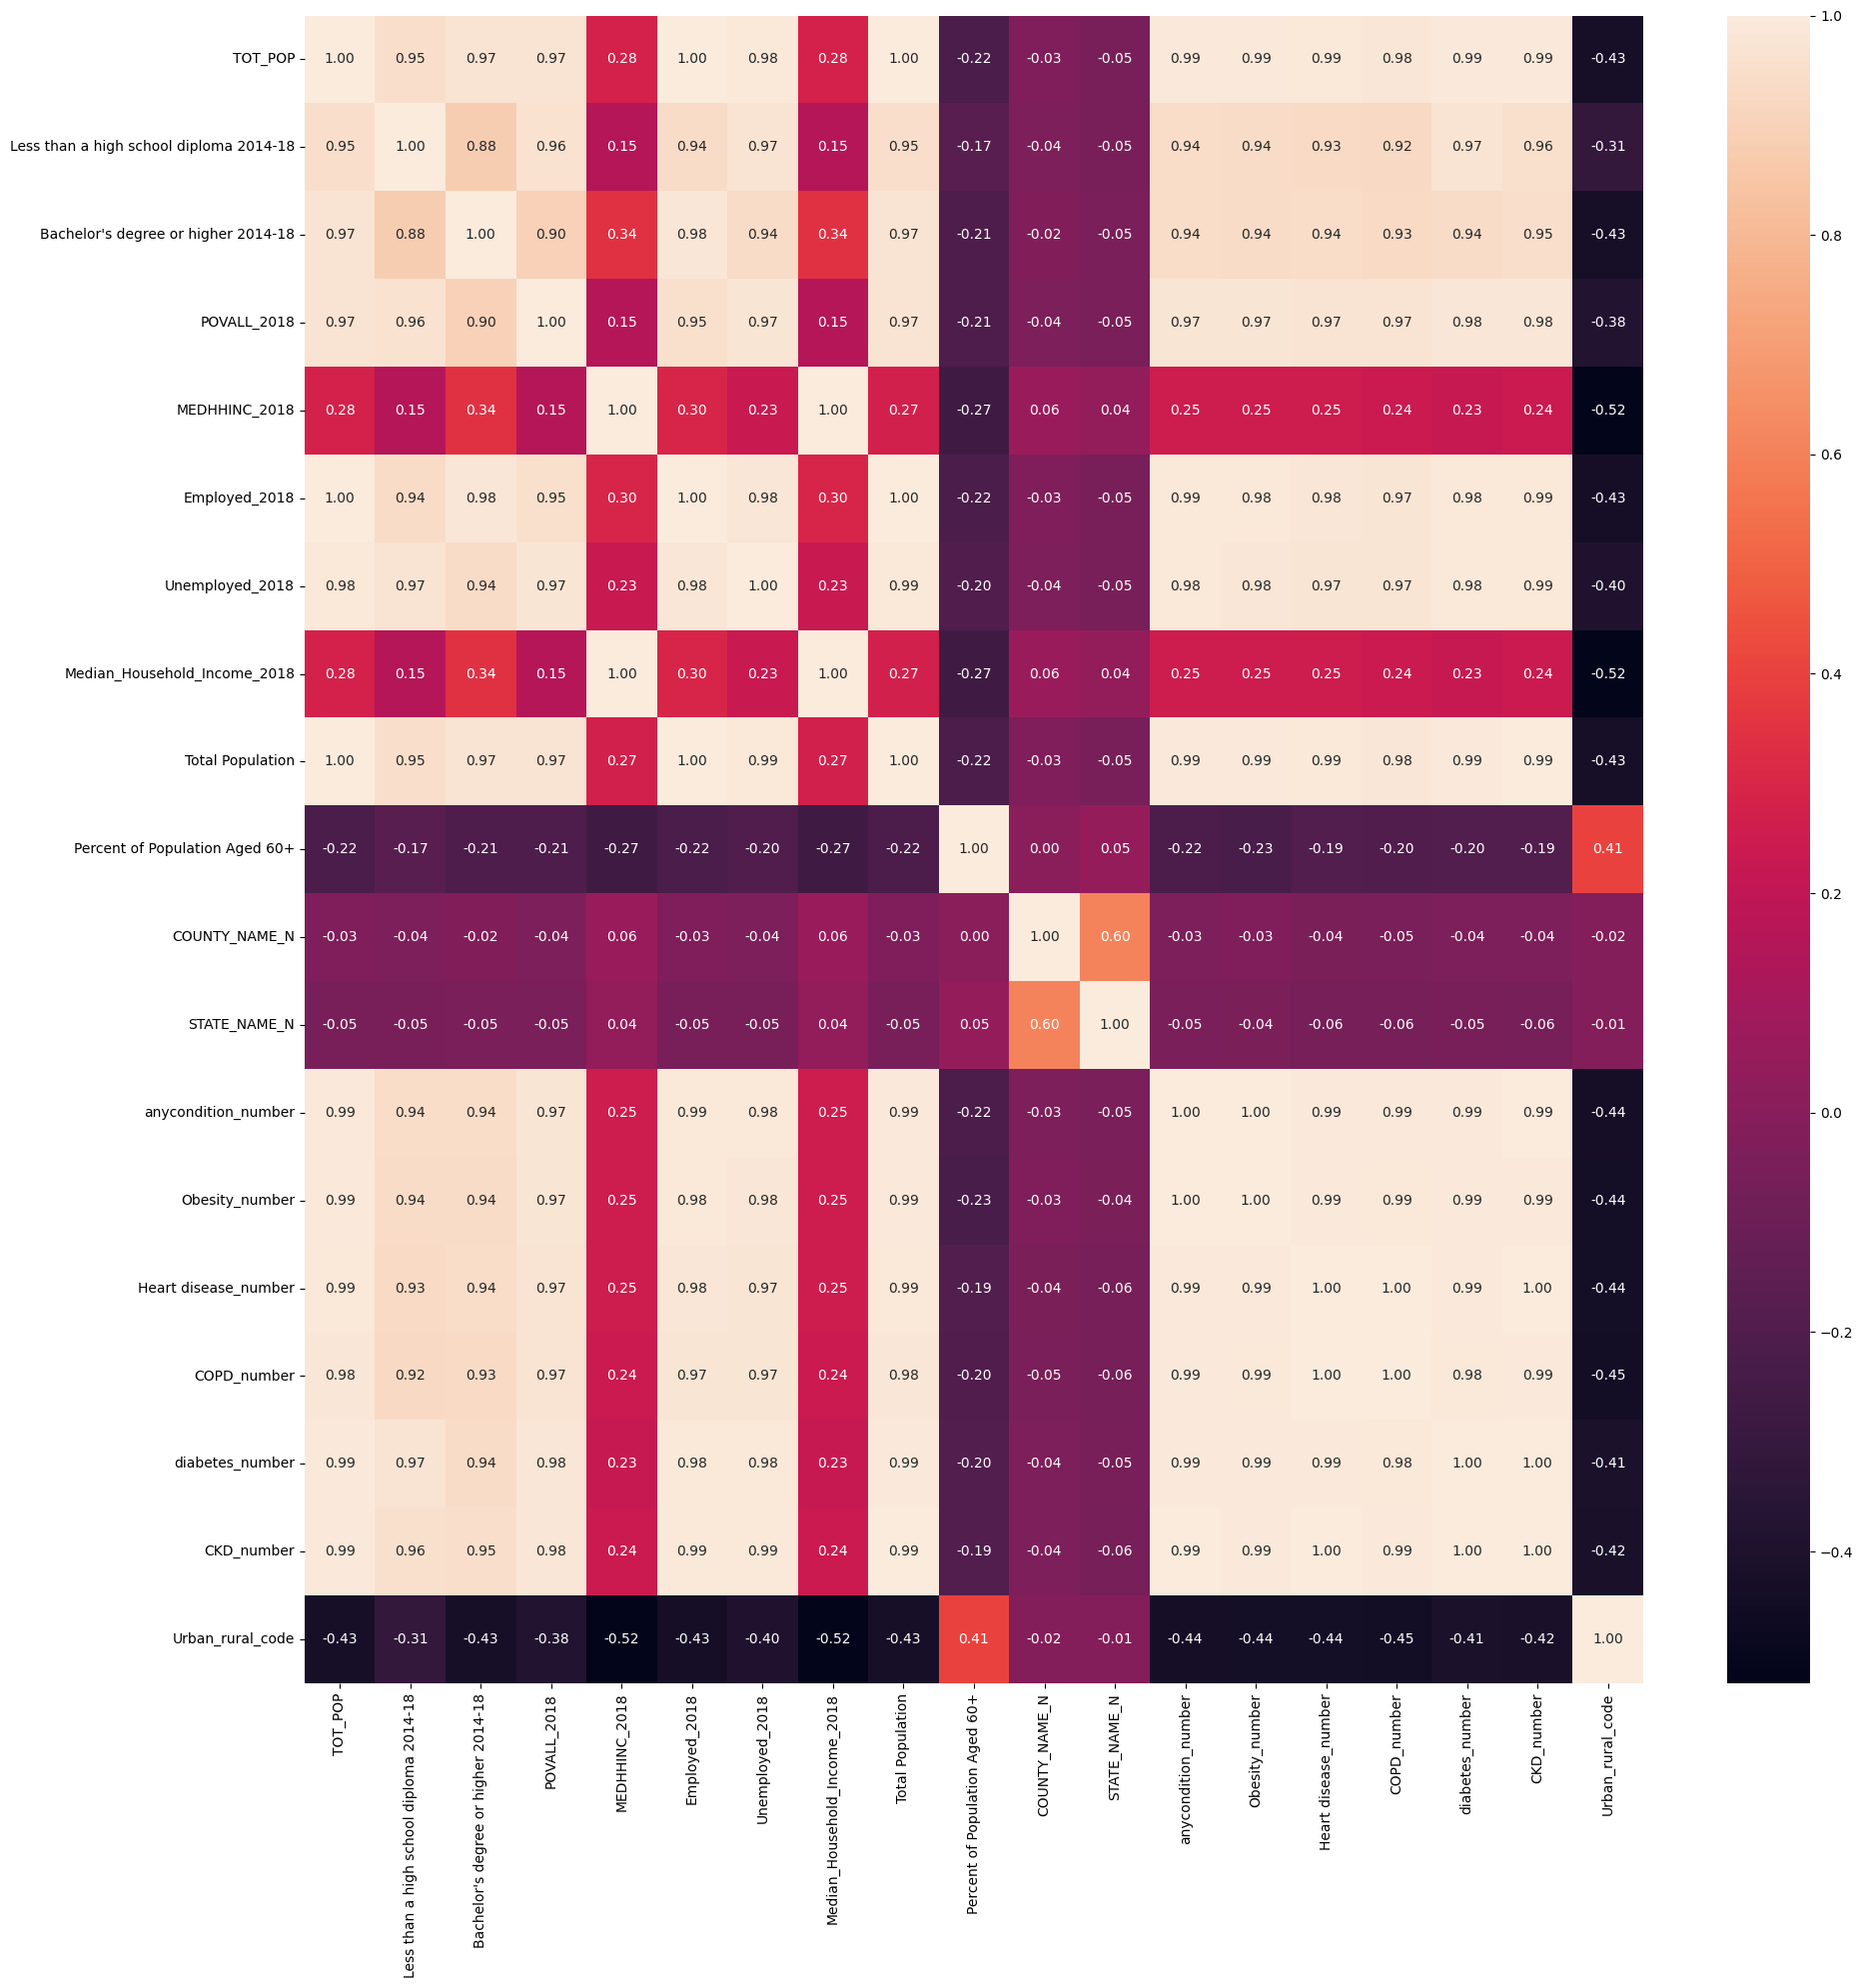

In [90]:
df["STATE_NAME_N"] = pd.factorize(df["STATE_NAME"])[0]
df["COUNTY_NAME_N"] = pd.factorize(df["COUNTY_NAME"])[0]


fig, axis = plt.subplots(figsize = (20, 20))

sns.heatmap(df[['TOT_POP', 'Less than a high school diploma 2014-18', "Bachelor's degree or higher 2014-18", 'POVALL_2018', 'MEDHHINC_2018', 'Employed_2018', 'Unemployed_2018','Median_Household_Income_2018', 'Total Population', 'Percent of Population Aged 60+', 'COUNTY_NAME_N', 'STATE_NAME_N','anycondition_number', 'Obesity_number','Heart disease_number','COPD_number','diabetes_number', 'CKD_number', 'Urban_rural_code' ]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [91]:
df.describe().round(2)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
count,3140.00,3140.00,3140.0,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,...,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00,3140.00
mean,30401.64,104189.41,12740.3,11.87,13367.98,12.69,14469.33,12.28,13916.49,11.75,...,12.09,14.05,9326.58,3.45,3.21,3.71,2466.23,4.64,26.25,688.48
std,15150.56,333583.40,41807.3,2.12,42284.39,1.82,49577.73,3.13,48990.95,1.70,...,2.62,2.82,29754.60,0.57,0.53,0.61,7730.42,1.51,14.26,541.77
min,1001.00,88.00,0.0,0.00,0.00,0.00,0.00,0.00,11.00,6.09,...,5.50,6.70,11.00,1.80,1.70,1.90,3.00,1.00,0.00,0.00
25%,18180.50,10963.25,1280.5,10.59,1374.50,11.67,1263.75,10.50,1232.75,10.69,...,10.30,12.10,1187.75,3.10,2.90,3.30,314.75,3.00,14.00,182.00
50%,29178.00,25800.50,3057.0,11.80,3274.00,12.69,3108.00,11.77,3000.50,11.58,...,11.80,13.80,2743.00,3.40,3.20,3.70,718.00,5.00,25.00,564.00
75%,45081.50,67913.00,8097.0,12.95,8822.25,13.66,8976.25,13.18,8314.25,12.64,...,13.70,15.90,6679.25,3.80,3.50,4.10,1776.25,6.00,40.00,1129.25
max,56045.00,10105518.00,1208253.0,25.46,1239139.00,23.30,1557073.00,37.57,1501844.00,22.23,...,24.20,27.00,952335.00,6.20,5.80,6.60,237766.00,6.00,50.00,1840.00


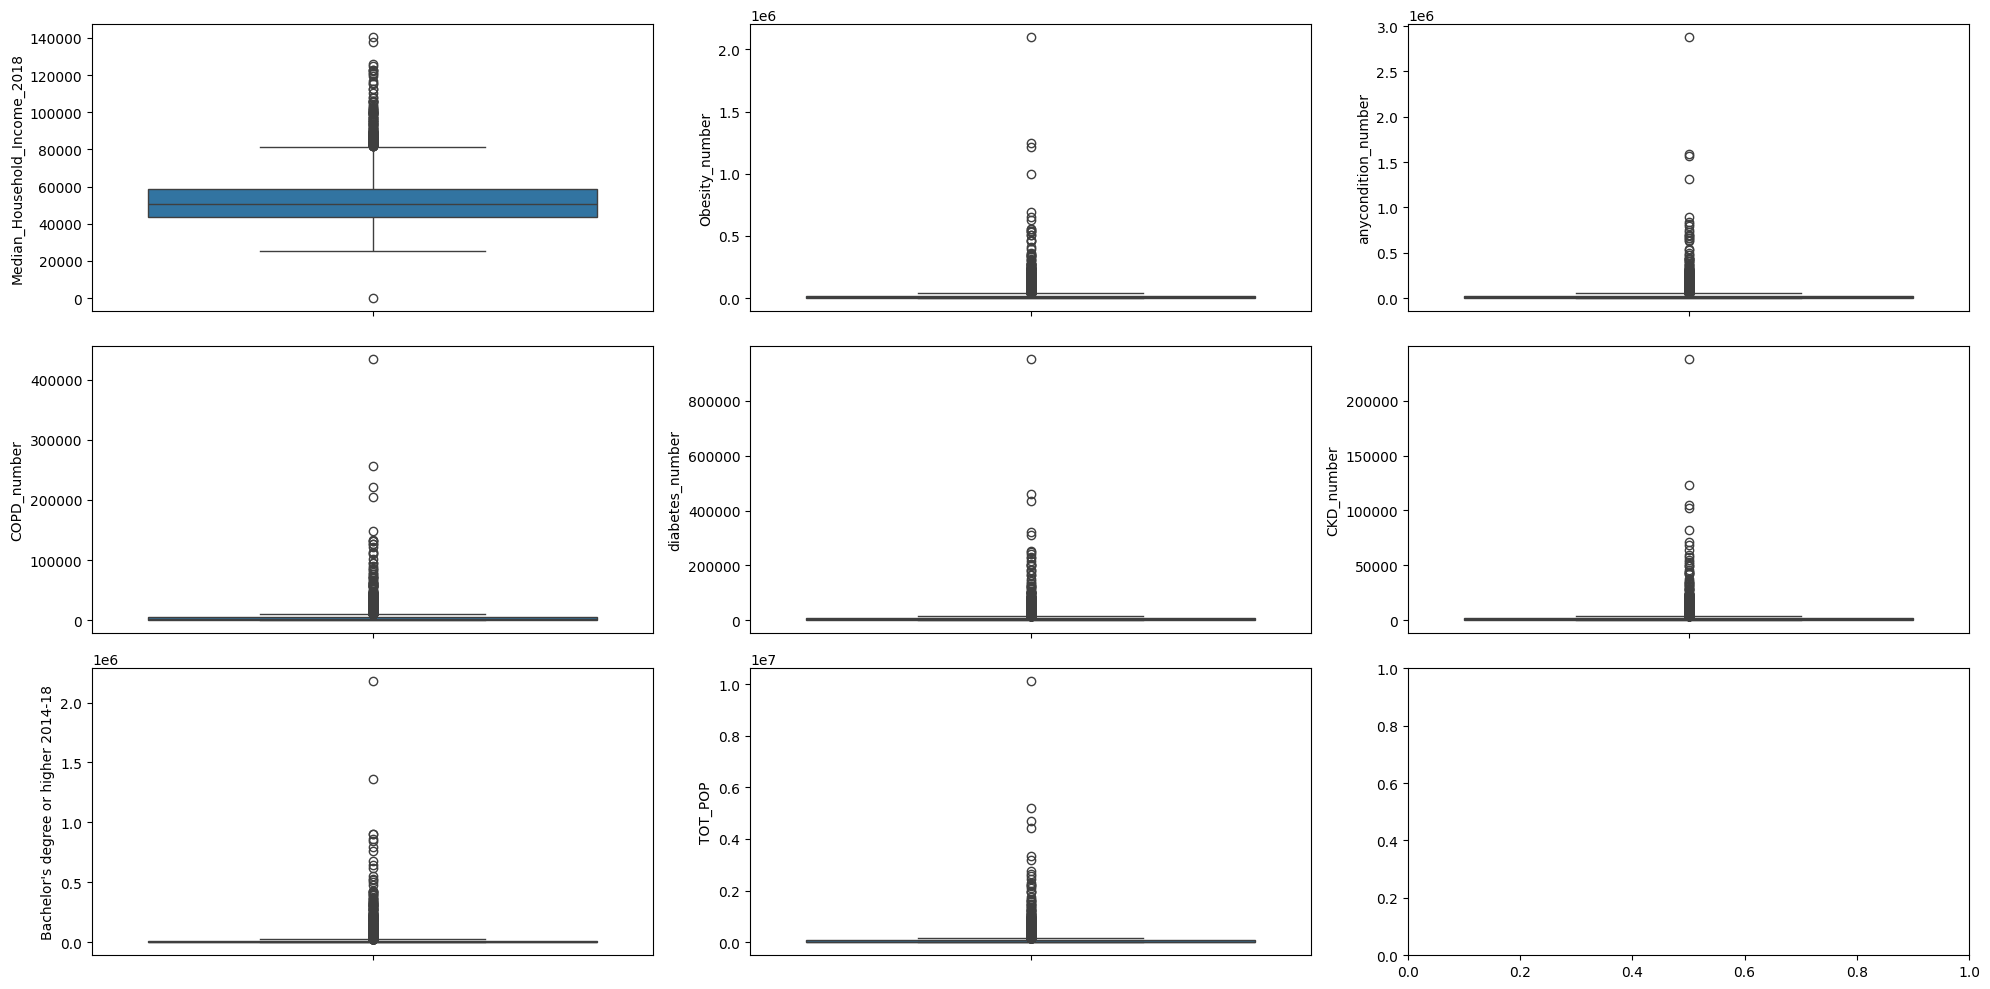

In [92]:
fig, axis = plt.subplots(3, 3, figsize = (20, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "Median_Household_Income_2018")
sns.boxplot(ax = axis[0, 1], data = df, y = "Obesity_number")
sns.boxplot(ax = axis[0, 2], data = df, y = "anycondition_number")
sns.boxplot(ax = axis[1, 0], data = df, y = "COPD_number")
sns.boxplot(ax = axis[1, 1], data = df, y = "diabetes_number")
sns.boxplot(ax = axis[1, 2], data = df, y = "CKD_number")
sns.boxplot(ax = axis[2, 0], data = df, y = "Bachelor's degree or higher 2014-18")
sns.boxplot(ax = axis[2, 1], data = df, y = "TOT_POP")


plt.tight_layout()

plt.show()

In [93]:
Q1 = df['Median_Household_Income_2018'].quantile(0.25)
Q3 = df['Median_Household_Income_2018'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 81540.12 y 20959.12, con un rango intercuartílico de 15145.25


In [94]:
sueldos = df[(df["Median_Household_Income_2018"] <= 20959.12) | (df["Median_Household_Income_2018"] >= 81540.12)]
sueldos

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
67,2016,5723,364,6.360301,376,6.569981,994,17.368513,968,16.914206,...,10.6,11.8,571,2.3,2.2,2.5,119,6,1,67
68,2020,291538,40841,14.008808,37189,12.756142,48243,16.547757,45464,15.594537,...,8.3,9.4,19490,2.4,2.3,2.5,5309,3,1,68
84,2185,9872,1568,15.883306,1249,12.651945,1382,13.999190,1509,15.285656,...,10.5,11.9,814,2.8,2.6,2.9,200,6,1,84
184,6001,1666753,192141,11.527863,188940,11.335813,236999,14.219203,275770,16.545343,...,8.9,10.0,124443,2.5,2.4,2.6,33226,1,4,166
190,6013,1150215,135747,11.801881,150421,13.077642,139695,12.145121,152889,13.292211,...,9.2,10.4,87571,2.8,2.6,2.9,24756,2,4,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,53061,814901,103059,12.646812,98197,12.050175,105607,12.959488,124712,15.303945,...,9.0,10.4,61120,2.5,2.4,2.7,15994,2,47,1772
3090,55089,89147,9764,10.952696,11737,13.165895,9341,10.478199,9934,11.143392,...,7.5,9.3,5861,2.7,2.5,2.9,1889,2,49,1815
3100,55109,89694,11490,12.810221,12704,14.163712,9633,10.739849,11823,13.181484,...,7.0,8.5,5262,2.4,2.3,2.6,1640,2,49,1819
3112,55133,403072,43910,10.893835,52186,12.947067,41926,10.401616,47965,11.899859,...,7.6,9.3,26700,2.6,2.4,2.8,8305,2,49,1827


In [95]:
upper_limit = 81540.12
lower_limit = 20959.12

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['Median_Household_Income_2018'] >= lower_limit) & (df['Median_Household_Income_2018'] <= upper_limit)]['Median_Household_Income_2018'].mean()

# Reemplazar outliers por la media
df['Median_Household_Income_2018'] = df['Median_Household_Income_2018'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [96]:
Q1 = df['Obesity_number'].quantile(0.25)
Q3 = df['Obesity_number'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 41743.75 y -20126.25, con un rango intercuartílico de 15467.5


In [97]:
obesidad_alta = df[(df["Obesity_number"] >= 41743.75)]
obesidad_alta

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,20520,3.2,3.0,3.5,5479,4,0,1
36,1073,659300,83866,12.720461,82823,12.562263,91855,13.932201,89590,13.588655,...,12.6,14.4,68819,3.4,3.2,3.6,17072,1,0,36
44,1089,366519,43078,11.753279,46922,12.802065,50959,13.903508,48362,13.194950,...,11.3,13.1,34952,3.0,2.8,3.2,8511,3,0,44
48,1097,413757,53407,12.907818,53561,12.945038,57388,13.869977,53044,12.820085,...,13.6,15.2,45540,3.5,3.3,3.7,11166,3,0,48
50,1101,225763,29734,13.170449,29321,12.987513,33292,14.746438,30303,13.422483,...,14.9,16.9,27581,3.6,3.4,3.8,6253,3,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,55087,187365,23839,12.723294,24708,13.187095,23808,12.706749,25709,13.721346,...,7.9,9.5,12475,2.6,2.4,2.8,3733,4,49,1814
3096,55101,196584,24549,12.487791,25364,12.902373,23784,12.098645,24160,12.289912,...,9.8,11.4,16007,3.0,2.8,3.3,4598,4,49,1818
3098,55105,163129,19981,12.248589,21849,13.393695,19982,12.249202,20353,12.476629,...,9.5,11.2,13020,3.0,2.8,3.3,3784,4,49,938
3112,55133,403072,43910,10.893835,52186,12.947067,41926,10.401616,47965,11.899859,...,7.6,9.3,26700,2.6,2.4,2.8,8305,2,49,1827


In [98]:
upper_limit = 41743.75
lower_limit = -20126.25

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['Obesity_number'] >= lower_limit) & (df['Obesity_number'] <= upper_limit)]['Obesity_number'].mean()

# Reemplazar outliers por la media
df['Obesity_number'] = df['Obesity_number'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [99]:
Q1 = df['anycondition_number'].quantile(0.25)
Q3 = df['anycondition_number'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 56180.62 y -26964.38, con un rango intercuartílico de 20786.25


In [100]:
any_alta = df[(df["anycondition_number"] >= 56180.62)]
any_alta

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,20520,3.2,3.0,3.5,5479,4,0,1
36,1073,659300,83866,12.720461,82823,12.562263,91855,13.932201,89590,13.588655,...,12.6,14.4,68819,3.4,3.2,3.6,17072,1,0,36
44,1089,366519,43078,11.753279,46922,12.802065,50959,13.903508,48362,13.194950,...,11.3,13.1,34952,3.0,2.8,3.2,8511,3,0,44
48,1097,413757,53407,12.907818,53561,12.945038,57388,13.869977,53044,12.820085,...,13.6,15.2,45540,3.5,3.3,3.7,11166,3,0,48
50,1101,225763,29734,13.170449,29321,12.987513,33292,14.746438,30303,13.422483,...,14.9,16.9,27581,3.6,3.4,3.8,6253,3,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3057,55025,542364,61475,11.334639,66383,12.239566,100920,18.607430,79679,14.691056,...,6.3,7.6,29825,2.3,2.2,2.5,10030,3,49,1800
3085,55079,948201,128789,13.582458,124876,13.169782,145947,15.391990,139301,14.691083,...,10.3,11.7,79326,3.2,3.0,3.3,22862,1,49,1812
3096,55101,196584,24549,12.487791,25364,12.902373,23784,12.098645,24160,12.289912,...,9.8,11.4,16007,3.0,2.8,3.3,4598,4,49,1818
3112,55133,403072,43910,10.893835,52186,12.947067,41926,10.401616,47965,11.899859,...,7.6,9.3,26700,2.6,2.4,2.8,8305,2,49,1827


In [101]:
upper_limit = 56180.62
lower_limit = -26964.38

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['anycondition_number'] >= lower_limit) & (df['anycondition_number'] <= upper_limit)]['anycondition_number'].mean()

# Reemplazar outliers por la media
df['anycondition_number'] = df['anycondition_number'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [102]:
Q1 = df['COPD_number'].quantile(0.25)
Q3 = df['COPD_number'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 10595.0 y -5053.0, con un rango intercuartílico de 3912.0


In [103]:
COPD_alto = df[(df["COPD_number"] >= 10595)]
COPD_alto

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,20520,3.2,3.0,3.5,5479,4,0,1
36,1073,659300,83866,12.720461,82823,12.562263,91855,13.932201,89590,13.588655,...,12.6,14.4,68819,3.4,3.2,3.6,17072,1,0,36
44,1089,366519,43078,11.753279,46922,12.802065,50959,13.903508,48362,13.194950,...,11.3,13.1,34952,3.0,2.8,3.2,8511,3,0,44
48,1097,413757,53407,12.907818,53561,12.945038,57388,13.869977,53044,12.820085,...,13.6,15.2,45540,3.5,3.3,3.7,11166,3,0,48
50,1101,225763,29734,13.170449,29321,12.987513,33292,14.746438,30303,13.422483,...,14.9,16.9,27581,3.6,3.4,3.8,6253,3,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3009,54039,180454,19474,10.791670,20336,11.269354,21530,11.931018,21389,11.852882,...,13.5,15.9,21166,3.6,3.4,3.9,5256,4,48,1785
3049,55009,263378,34300,13.023107,35364,13.427090,35099,13.326474,35463,13.464678,...,8.3,9.8,18187,2.7,2.5,2.9,5484,3,49,486
3057,55025,542364,61475,11.334639,66383,12.239566,100920,18.607430,79679,14.691056,...,6.3,7.6,29825,2.3,2.2,2.5,10030,3,49,1800
3085,55079,948201,128789,13.582458,124876,13.169782,145947,15.391990,139301,14.691083,...,10.3,11.7,79326,3.2,3.0,3.3,22862,1,49,1812


In [104]:
upper_limit = 10595
lower_limit = -5053

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['COPD_number'] >= lower_limit) & (df['COPD_number'] <= upper_limit)]['COPD_number'].mean()

# Reemplazar outliers por la media
df['COPD_number'] = df['COPD_number'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [105]:
Q1 = df['diabetes_number'].quantile(0.25)
Q3 = df['diabetes_number'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 14916.5 y -7049.5, con un rango intercuartílico de 5491.5


In [106]:
diabetes_alta = df[(df["diabetes_number"] >= 14916.5)]
diabetes_alta

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,20520,3.2,3.0,3.5,5479,4,0,1
36,1073,659300,83866,12.720461,82823,12.562263,91855,13.932201,89590,13.588655,...,12.6,14.4,68819,3.4,3.2,3.6,17072,1,0,36
44,1089,366519,43078,11.753279,46922,12.802065,50959,13.903508,48362,13.194950,...,11.3,13.1,34952,3.0,2.8,3.2,8511,3,0,44
48,1097,413757,53407,12.907818,53561,12.945038,57388,13.869977,53044,12.820085,...,13.6,15.2,45540,3.5,3.3,3.7,11166,3,0,48
50,1101,225763,29734,13.170449,29321,12.987513,33292,14.746438,30303,13.422483,...,14.9,16.9,27581,3.6,3.4,3.8,6253,3,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,55009,263378,34300,13.023107,35364,13.427090,35099,13.326474,35463,13.464678,...,8.3,9.8,18187,2.7,2.5,2.9,5484,3,49,486
3057,55025,542364,61475,11.334639,66383,12.239566,100920,18.607430,79679,14.691056,...,6.3,7.6,29825,2.3,2.2,2.5,10030,3,49,1800
3085,55079,948201,128789,13.582458,124876,13.169782,145947,15.391990,139301,14.691083,...,10.3,11.7,79326,3.2,3.0,3.3,22862,1,49,1812
3096,55101,196584,24549,12.487791,25364,12.902373,23784,12.098645,24160,12.289912,...,9.8,11.4,16007,3.0,2.8,3.3,4598,4,49,1818


In [107]:
upper_limit = 14916.5
lower_limit = -7049.5

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['diabetes_number'] >= lower_limit) & (df['diabetes_number'] <= upper_limit)]['diabetes_number'].mean()

# Reemplazar outliers por la media
df['diabetes_number'] = df['diabetes_number'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [108]:
Q1 = df['CKD_number'].quantile(0.25)
Q3 = df['CKD_number'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 3968.5 y -1877.5, con un rango intercuartílico de 1461.5


In [109]:
CKD_alta = df[(df["CKD_number"] >= 3968.5)]
CKD_alta

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,3341.03561,3.2,3.0,3.5,5479,4,0,1
36,1073,659300,83866,12.720461,82823,12.562263,91855,13.932201,89590,13.588655,...,12.6,14.4,3341.03561,3.4,3.2,3.6,17072,1,0,36
44,1089,366519,43078,11.753279,46922,12.802065,50959,13.903508,48362,13.194950,...,11.3,13.1,3341.03561,3.0,2.8,3.2,8511,3,0,44
48,1097,413757,53407,12.907818,53561,12.945038,57388,13.869977,53044,12.820085,...,13.6,15.2,3341.03561,3.5,3.3,3.7,11166,3,0,48
50,1101,225763,29734,13.170449,29321,12.987513,33292,14.746438,30303,13.422483,...,14.9,16.9,3341.03561,3.6,3.4,3.8,6253,3,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3049,55009,263378,34300,13.023107,35364,13.427090,35099,13.326474,35463,13.464678,...,8.3,9.8,3341.03561,2.7,2.5,2.9,5484,3,49,486
3057,55025,542364,61475,11.334639,66383,12.239566,100920,18.607430,79679,14.691056,...,6.3,7.6,3341.03561,2.3,2.2,2.5,10030,3,49,1800
3085,55079,948201,128789,13.582458,124876,13.169782,145947,15.391990,139301,14.691083,...,10.3,11.7,3341.03561,3.2,3.0,3.3,22862,1,49,1812
3096,55101,196584,24549,12.487791,25364,12.902373,23784,12.098645,24160,12.289912,...,9.8,11.4,3341.03561,3.0,2.8,3.3,4598,4,49,1818


In [110]:
upper_limit = 3968.5
lower_limit = -1877.5

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['CKD_number'] >= lower_limit) & (df['CKD_number'] <= upper_limit)]['CKD_number'].mean()

# Reemplazar outliers por la media
df['CKD_number'] = df['CKD_number'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [111]:
Q1 = df["Bachelor's degree or higher 2014-18"].quantile(0.25)
Q3 = df["Bachelor's degree or higher 2014-18"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 24439.25 y -12740.75, con un rango intercuartílico de 9295.0


In [112]:
estudios_alto = df[(df["Bachelor's degree or higher 2014-18"] >= 24439.25)]
estudios_alto

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,3341.03561,3.2,3.0,3.5,881.840232,4,0,1
36,1073,659300,83866,12.720461,82823,12.562263,91855,13.932201,89590,13.588655,...,12.6,14.4,3341.03561,3.4,3.2,3.6,881.840232,1,0,36
40,1081,163941,19180,11.699331,23398,14.272208,34582,21.094174,20928,12.765568,...,10.5,11.9,14475.00000,2.8,2.6,2.9,3551.000000,4,0,40
44,1089,366519,43078,11.753279,46922,12.802065,50959,13.903508,48362,13.194950,...,11.3,13.1,3341.03561,3.0,2.8,3.2,881.840232,3,0,44
48,1097,413757,53407,12.907818,53561,12.945038,57388,13.869977,53044,12.820085,...,13.6,15.2,3341.03561,3.5,3.3,3.7,881.840232,3,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,55089,89147,9764,10.952696,11737,13.165895,9341,10.478199,9934,11.143392,...,7.5,9.3,5861.00000,2.7,2.5,2.9,1889.000000,2,49,1815
3096,55101,196584,24549,12.487791,25364,12.902373,23784,12.098645,24160,12.289912,...,9.8,11.4,3341.03561,3.0,2.8,3.3,881.840232,4,49,1818
3111,55131,135693,15161,11.173016,17524,12.914447,13807,10.175175,16069,11.842173,...,8.0,9.7,9375.00000,2.7,2.5,2.9,2854.000000,2,49,64
3112,55133,403072,43910,10.893835,52186,12.947067,41926,10.401616,47965,11.899859,...,7.6,9.3,3341.03561,2.6,2.4,2.8,881.840232,2,49,1827


In [113]:
upper_limit = 24439.25
lower_limit = -12740.75

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df["Bachelor's degree or higher 2014-18"] >= lower_limit) & (df["Bachelor's degree or higher 2014-18"] <= upper_limit)]["Bachelor's degree or higher 2014-18"].mean()

# Reemplazar outliers por la media
df["Bachelor's degree or higher 2014-18"] = df["Bachelor's degree or higher 2014-18"].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [114]:
Q1 = df["TOT_POP"].quantile(0.25)
Q3 = df["TOT_POP"].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(IQR, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 153337.62 y -74461.38, con un rango intercuartílico de 56949.75


In [115]:
poblacion_alto = df[(df["TOT_POP"] >= 153337.62)]
poblacion_alto

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,11.0,13.1,3341.03561,3.2,3.0,3.5,881.840232,4,0,1
36,1073,659300,83866,12.720461,82823,12.562263,91855,13.932201,89590,13.588655,...,12.6,14.4,3341.03561,3.4,3.2,3.6,881.840232,1,0,36
40,1081,163941,19180,11.699331,23398,14.272208,34582,21.094174,20928,12.765568,...,10.5,11.9,14475.00000,2.8,2.6,2.9,3551.000000,4,0,40
44,1089,366519,43078,11.753279,46922,12.802065,50959,13.903508,48362,13.194950,...,11.3,13.1,3341.03561,3.0,2.8,3.2,881.840232,3,0,44
48,1097,413757,53407,12.907818,53561,12.945038,57388,13.869977,53044,12.820085,...,13.6,15.2,3341.03561,3.5,3.3,3.7,881.840232,3,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,55087,187365,23839,12.723294,24708,13.187095,23808,12.706749,25709,13.721346,...,7.9,9.5,12475.00000,2.6,2.4,2.8,3733.000000,4,49,1814
3096,55101,196584,24549,12.487791,25364,12.902373,23784,12.098645,24160,12.289912,...,9.8,11.4,3341.03561,3.0,2.8,3.3,881.840232,4,49,1818
3098,55105,163129,19981,12.248589,21849,13.393695,19982,12.249202,20353,12.476629,...,9.5,11.2,13020.00000,3.0,2.8,3.3,3784.000000,4,49,938
3112,55133,403072,43910,10.893835,52186,12.947067,41926,10.401616,47965,11.899859,...,7.6,9.3,3341.03561,2.6,2.4,2.8,881.840232,2,49,1827


In [116]:
upper_limit = 153337.62
lower_limit = -74461.38

# Calcular la media excluyendo los valores atípicos
media_sin_outliers = df[(df['TOT_POP'] >= lower_limit) & (df['TOT_POP'] <= upper_limit)]['TOT_POP'].mean()

# Reemplazar outliers por la media
df['TOT_POP'] = df['TOT_POP'].apply(
    lambda x: media_sin_outliers if (x < lower_limit or x > upper_limit) else x
)

In [117]:
#VALORES FALTANTES

df.isnull().sum().sort_values(ascending=False)

fips                      0
TOT_POP                   0
0-9                       0
0-9 y/o % of total pop    0
19-Oct                    0
                         ..
CKD_Upper 95% CI          0
CKD_number                0
Urban_rural_code          0
STATE_NAME_N              0
COUNTY_NAME_N             0
Length: 110, dtype: int64

In [118]:
from sklearn.preprocessing import StandardScaler

data_types = df.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(df[numeric_columns])

total_data_scal = pd.DataFrame(norm_features, index = df.index, columns = numeric_columns)
total_data_scal["Heart disease_number"] = df["Heart disease_number"]
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,STATE_NAME_N,COUNTY_NAME_N,Heart disease_number
0,-1.940874,7.744969e-01,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.089834,0.706129,-0.609615,-0.582796,-0.669652,5.585354e-01,-1.082865,-1.841303,-1.271003,3345
1,-1.940742,1.211623e-16,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.337677,0.000000,-0.433549,-0.393279,-0.343373,1.429624e-16,-0.420704,-1.841303,-1.269157,13414
2,-1.940610,-2.486273e-01,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.317776,0.176107,1.855312,1.880929,1.777443,6.488460e-03,0.903618,-1.841303,-1.267311,2159
3,-1.940478,-3.312566e-01,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.299632,-0.276342,-0.257483,-0.203761,-0.180233,-3.607045e-01,-1.745026,-1.841303,-1.265465,1533
4,-1.940346,8.490664e-01,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.158008,0.890905,-0.081417,-0.014244,-0.017093,7.861448e-01,-1.745026,-1.841303,-1.263619,4101


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older
0,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,-0.229069,...,-0.265998,-0.209960,-0.296253,-0.200967,-0.212643,-0.208590,-0.281569,-0.231195,-0.229737,-0.233171
1,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,-0.126439,...,-0.160316,-0.063930,-0.200038,-0.099506,-0.116680,-0.110850,-0.186994,-0.150293,-0.098866,-0.152859
2,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,-0.187194,...,-0.215815,-0.271374,-0.212007,-0.223776,-0.192263,-0.217668,-0.210637,-0.197005,-0.216056,-0.195125
3,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,-0.044020,...,-0.171032,0.021187,0.293680,-0.149645,0.062458,-0.107888,-0.210637,-0.036940,-0.030034,-0.039882
4,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,0.126315,...,0.044000,0.262528,0.065717,0.171698,0.274818,0.194913,0.096733,0.097767,0.161314,0.088485


In [120]:
X_test_sel.head()

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older
0,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,-0.310321,...,-0.311635,-0.300774,-0.361874,-0.271963,-0.303292,-0.285225,-0.281569,-0.284324,-0.308211,-0.283698
1,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,0.603128,...,0.364234,0.464124,0.381731,0.332062,0.853184,0.424904,-0.045130,0.477184,0.620724,0.517408
2,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,-0.268576,...,-0.268226,-0.282129,-0.290313,-0.257120,-0.277451,-0.261868,-0.281569,-0.257294,-0.287868,-0.259943
3,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,0.133430,...,-0.005319,0.187359,0.008130,0.112410,0.197267,0.130719,-0.281569,0.036299,0.055281,0.031494
4,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,0.486222,...,0.248662,0.334822,0.256252,0.229856,0.659217,0.305024,0.002157,0.336581,0.423969,0.390596


In [121]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [122]:
total_data = pd.concat([X_train_sel, X_test_sel])
total_data.head()

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,Heart disease_number
0,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,-0.229069,...,-0.209960,-0.296253,-0.200967,-0.212643,-0.208590,-0.281569,-0.231195,-0.229737,-0.233171,2072
1,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,-0.126439,...,-0.063930,-0.200038,-0.099506,-0.116680,-0.110850,-0.186994,-0.150293,-0.098866,-0.152859,3796
2,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,-0.187194,...,-0.271374,-0.212007,-0.223776,-0.192263,-0.217668,-0.210637,-0.197005,-0.216056,-0.195125,2222
3,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,-0.044020,...,0.021187,0.293680,-0.149645,0.062458,-0.107888,-0.210637,-0.036940,-0.030034,-0.039882,5484
4,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,0.126315,...,0.262528,0.065717,0.171698,0.274818,0.194913,0.096733,0.097767,0.161314,0.088485,8686


In [123]:
X_test_sel.head()

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,Heart disease_number
0,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,-0.310321,...,-0.300774,-0.361874,-0.271963,-0.303292,-0.285225,-0.281569,-0.284324,-0.308211,-0.283698,698
1,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,0.603128,...,0.464124,0.381731,0.332062,0.853184,0.424904,-0.045130,0.477184,0.620724,0.517408,13982
2,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,-0.268576,...,-0.282129,-0.290313,-0.257120,-0.277451,-0.261868,-0.281569,-0.257294,-0.287868,-0.259943,1768
3,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,0.133430,...,0.187359,0.008130,0.112410,0.197267,0.130719,-0.281569,0.036299,0.055281,0.031494,6739
4,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,0.486222,...,0.334822,0.256252,0.229856,0.659217,0.305024,0.002157,0.336581,0.423969,0.390596,11305


In [124]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,White-alone pop,...,Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,county_pop2018_18 and older,Heart disease_number
0,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,-0.229069,...,-0.209960,-0.296253,-0.200967,-0.212643,-0.208590,-0.281569,-0.231195,-0.229737,-0.233171,2072
1,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,-0.126439,...,-0.063930,-0.200038,-0.099506,-0.116680,-0.110850,-0.186994,-0.150293,-0.098866,-0.152859,3796
2,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,-0.187194,...,-0.271374,-0.212007,-0.223776,-0.192263,-0.217668,-0.210637,-0.197005,-0.216056,-0.195125,2222
3,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,-0.044020,...,0.021187,0.293680,-0.149645,0.062458,-0.107888,-0.210637,-0.036940,-0.030034,-0.039882,5484
4,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,0.126315,...,0.262528,0.065717,0.171698,0.274818,0.194913,0.096733,0.097767,0.161314,0.088485,8686


In [125]:
X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

In [126]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [127]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): [-0.36421678 -0.36453343 -0.36278543 ... -2.54666567 -2.31556665
 -2.11896082]
Coefficients: [[-0.0734919  -0.07945757 -0.06511255 ... -0.07907041 -0.10385013
  -0.07849279]
 [-0.07415994 -0.08011625 -0.06558761 ... -0.07899272 -0.10384515
  -0.07850301]
 [-0.07343404 -0.07941021 -0.06518999 ... -0.07855078 -0.10399124
  -0.07822942]
 ...
 [ 0.27103052  0.28723512  0.24194685 ...  0.21481874  0.23569792
   0.23838286]
 [ 0.16630786  0.14376686  0.23364881 ...  0.23129474  0.24066393
   0.21669689]
 [ 0.17049282  0.1652627   0.27313883 ...  0.23652808  0.19616227
   0.23439861]]


In [128]:
y_pred = model.predict(X_test)
y_pred

array([ 1072, 12721,  1072,  4945,  7128,  1072,  1072,  1072,  1072,
        1050,  1072,  1072,  3376,  1072,  7128,  1072, 66065,  1072,
        1072,  1072,  1072,  1072,  1072,  1072, 40686,  1072,  1072,
        1072,  1072,  1072,  1072,  1050,  1072,  1072,  4945,  1072,
        1072,  1072,  1072,  1072,  1072, 14102,  1072,  1072,  1072,
        1072,  1072,  6026,  1072,  1072, 32863,  1072,  1072,  1072,
        7128,  1072, 40556,  1072,  3376,  1072, 14892,  1072,  1072,
       19213,  1072,  3376,  1072,  1072,  1072, 23077,  1448,  1072,
        1072,  1072,  1072,  1072, 28883,  1072,  1072,  1072,  1072,
        3376, 12367,  1072,  1072,  1072, 29483,  1072,  1072,  7128,
        1072,  1072,  1072,  1072,  1072,  1072,  1072,  1072,  8506,
        1072, 62563,  4945,  1072,  1072,  1072,  3376,  1072,  3376,
        7128, 20299,  1072,  8506, 25091,  1448,  1072, 16376,  1072,
        1072, 12677,  1072,  1072,  1072,  1072,  1072,  1072,  1072,
        2523,  1072,

In [129]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 19483498.99044586
R2 Score: 0.7773962546509128


In [134]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha = 0.3, max_iter = 1000)

# entrenamiento
reg_lasso.fit(X_train, y_train)

# prediccion
y_pred = reg_lasso.predict(X_test)
y_pred

# metricas
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
r2_l1 = r2_score(y_test, y_pred)

print("MSE: ", mse_l1)
print("RMSE: ", rmse_l1)
print("Coeficiente de determinación: ", r2_l1)

MSE:  638803.946759375
RMSE:  799.2521171441306
Coeficiente de determinación:  0.9927015085348814


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.463e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [136]:
from sklearn.linear_model import Ridge
import numpy as np
# modelo
reg_ridge = Ridge(alpha = 0.2, max_iter = 4000)

# entrenamiento
reg_ridge.fit(X_train, y_train)

# prediccion
y_pred = reg_ridge.predict(X_test)
y_pred

# metricas
mse_l2 = mean_squared_error(y_test, y_pred)
rmse_l2 = np.sqrt(mse_l2)
r2_l2 = r2_score(y_test, y_pred)

print("MSE: ", mse_l2)
print("RMSE: ", rmse_l2)
print("Coeficiente de determinación: ", r2_l2)

MSE:  515407.27690907323
RMSE:  717.9187119089969
Coeficiente de determinación:  0.9941113456943029


Nos quedamos con el  modelo de Ridge 